## Lineáris Regresszió példa

* Diabétesz adathalmazon tanítva és tesztelve

In [39]:
# szükséges könyvtárak importálása

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [40]:
# diabétesz adathalmaz beolvasása, tisztítása

df = pd.read_csv('data/advertising.csv')
df.head()

# egyszerű adattisztítás a hiányos és duplikált sorok eltávolításával
df = df.dropna()
df = df.drop_duplicates()

In [41]:
# tanító (80%) és teszt (20%) adathalmaz meghatározása

X = df.drop(columns=["Sales"])
y_true = df["Sales"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y_true, train_size=0.8, test_size=0.2, random_state=42 
)

In [42]:
# modell definiálása és tanítása lineáris regresszióval

model = LinearRegression()

model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R2:", r2)

MSE: 2.9077569102710896
MAE: 1.2748262109549338
R2: 0.9059011844150826


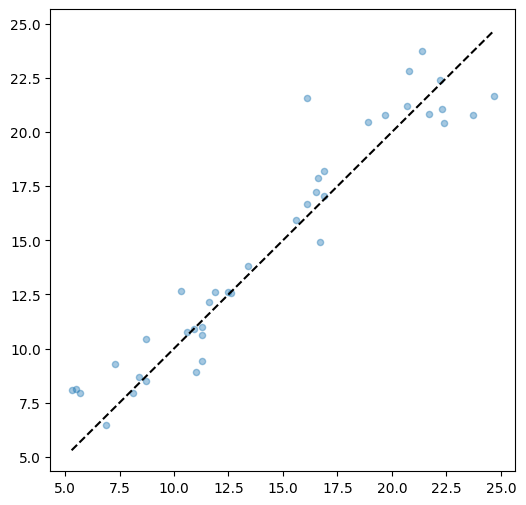

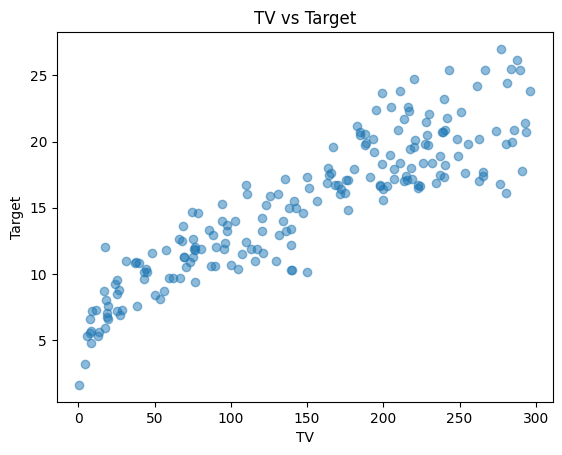

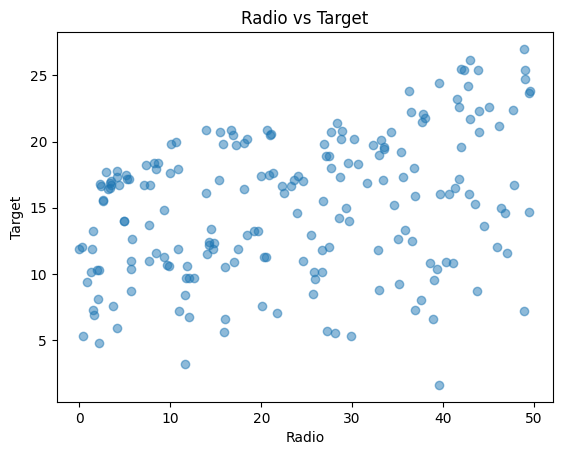

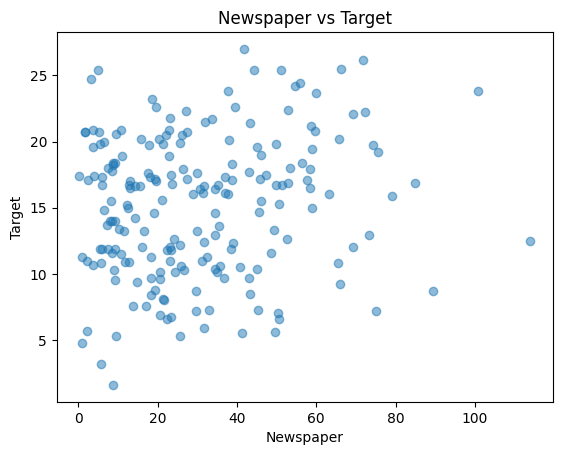

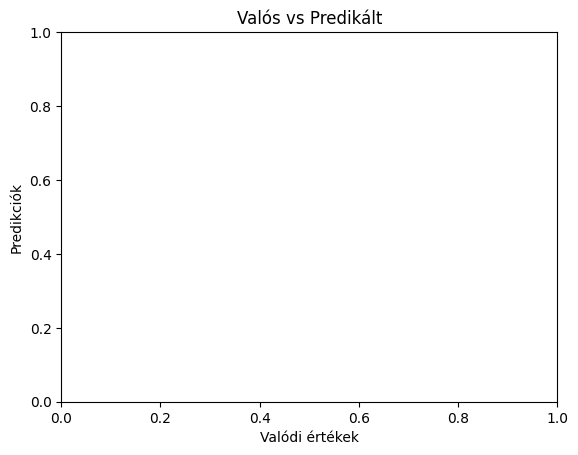

In [ ]:
# eredmények vizualizálása

plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_pred, alpha=0.4, s=20)

# tökéletes predikció 
min_val = min(min(Y_test), min(y_pred))
max_val = max(max(Y_test), max(y_pred))



for col in X.columns:
    plt.figure()
    plt.scatter(X[col], y_true, alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Target")
    plt.title(f"{col} vs Target")
    plt.show()

plt.plot([min_val, max_val], [min_val, max_val], 'k--')

plt.show()